(0, [1, (3, [0, 1]), (2, [0, 1])])


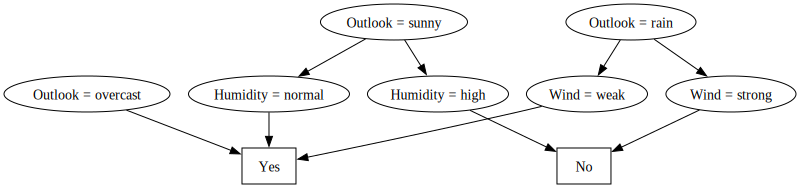

In [24]:
import numpy as np

def entropy(y):
    '''Hàm tính entropy của tập dữ liệu y
    y: mảng 1 chiều chứa nhãn của các mẫu dữ liệu
    '''
    n = len(y)
    labels, counts = np.unique(y, return_counts=True)
    probs = counts / n
    return -np.sum(probs * np.log2(probs))

def information_gain(X, y, feature):
    '''Hàm tính Information Gain khi chia tập dữ liệu X theo feature
    X: mảng 2 chiều chứa các mẫu dữ liệu
    y: mảng 1 chiều chứa nhãn của các mẫu dữ liệu
    feature: chỉ số cột của feature cần tính Information Gain
    '''
    n = len(y)
    entropy_before = entropy(y)
    values = np.unique(X[:, feature])
    entropy_after = 0
    for v in values:
        y_v = y[X[:, feature] == v]
        entropy_after += len(y_v) / n * entropy(y_v)
    return entropy_before - entropy_after

def split(X, y, feature):
    '''Hàm chia tập dữ liệu X theo feature
    X: mảng 2 chiều chứa các mẫu dữ liệu
    y: mảng 1 chiều chứa nhãn của các mẫu dữ liệu
    feature: chỉ số cột của feature cần chia
    '''
    values = np.unique(X[:, feature])
    partitions = []
    for v in values:
        mask = X[:, feature] == v
        partitions.append((X[mask], y[mask]))
    return partitions

def build_tree(X, y, features):
    '''Hàm xây dựng cây quyết định
    X: mảng 2 chiều chứa các mẫu dữ liệu
    y: mảng 1 chiều chứa nhãn của các mẫu dữ liệu
    features: mảng 1 chiều chứa chỉ số cột của các feature
    '''
    if len(np.unique(y)) == 1:
        return y[0]
    if len(features) == 0:
        return np.bincount(y).argmax()
    gains = [information_gain(X, y, f) for f in features]
    best_feature = features[np.argmax(gains)]
    features = features[features != best_feature]
    partitions = split(X, y, best_feature)
    children = [build_tree(X_p, y_p, features) for X_p, y_p in partitions]
    return (best_feature, children)


# data weathers
X = np.array([
    ['sunny', 'hot', 'high', 'weak'],
    ['sunny', 'hot', 'high', 'strong'],
    ['overcast', 'hot', 'high', 'weak'],
    ['rain', 'mild', 'high', 'weak'],
    ['rain', 'cool', 'normal', 'weak'],
    ['rain', 'cool', 'normal', 'strong'],
    ['overcast', 'cool', 'normal', 'strong'],
    ['sunny', 'mild', 'high', 'weak'],
    ['sunny', 'cool', 'normal', 'weak'],
    ['rain', 'mild', 'normal', 'weak'],
    ['sunny', 'mild', 'normal', 'strong'],
    ['overcast', 'mild', 'high', 'strong'],
    ['overcast', 'hot', 'normal', 'weak'],
    ['rain', 'mild', 'high', 'strong']
])

y = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])


features = np.array([0, 1, 2, 3])
tree = build_tree(X, y, features)
print(tree)

import graphviz

def visualize_tree(tree, feature_names, class_names):
    dot = graphviz.Digraph()

    def add_nodes(tree, parent_node=None):
        if isinstance(tree, tuple):
            feature_index, children = tree
            feature_name = feature_names[feature_index]

            # Lấy các giá trị feature có thể có
            values = np.unique(X[:, feature_index])  

            for value, child in zip(values, children):
            # Thêm tên feature và giá trị vào nút
                dot.node(f'{feature_index}_{value}', f'{feature_name} = {value}')

                if parent_node is not None:
                    dot.edge(parent_node, f'{feature_index}_{value}')
                add_nodes(child, f'{feature_index}_{value}')
                
        else:
            class_label = class_names[tree]
            dot.node(str(tree), class_label, shape='box')
            if parent_node is not None:
                dot.edge(str(parent_node), str(tree))
    
    add_nodes(tree)
    # print(dot.source)
    return dot


# Ví dụ với dữ liệu thời tiết
feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']
class_names = ['No', 'Yes']

# Vẽ cây quyết định
visualize_tree(tree, feature_names, class_names)




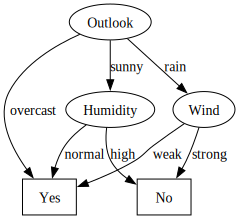

In [86]:
def visualize_tree(tree, feature_names, class_names):
    dot = graphviz.Digraph()

    def add_nodes(tree, parent_node=None, parent_feature_name=None):
        if isinstance(tree, tuple):
            feature_index, children = tree
            feature_name = feature_names[feature_index]

            # Nếu có feature cha, thêm tên feature vào mỗi nút
            if parent_feature_name is not None:
                dot.node(str(tree), f"{feature_name}")

            # Lấy các giá trị feature có thể có
            values = np.unique(X[:, feature_index])

            for value, child in zip(values, children):
                # Thêm nhãn cho các cạnh
                # if parent_node is not None:
                dot.edge(str(parent_node), str(child), label=f"{value}")
                add_nodes(child, parent_node=child, parent_feature_name=feature_name)
        else:
            class_label = class_names[tree]
            dot.node(str(tree), class_label, shape='box')
            # if parent_node is not None:
            #     dot.edge(str(parent_node), str(tree))

    # Thêm xử lý riêng cho nút gốc
    if isinstance(tree, tuple):
        feature_index, children = tree
        feature_name = feature_names[feature_index]
        dot.node(str(tree), f"{feature_name}")
        values = np.unique(X[:, feature_index])
        for value, child in zip(values, children):
            dot.edge(str(tree), str(child), label=f"{value}")
            add_nodes(child, parent_node=child, parent_feature_name=feature_name)
    else:
        class_label = class_names[tree]
        dot.node(str(tree), class_label, shape='box')

    return dot

visualize_tree(tree, feature_names, class_names)
